In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import Audio
np.random.seed(100)
plt.style.use("classic")

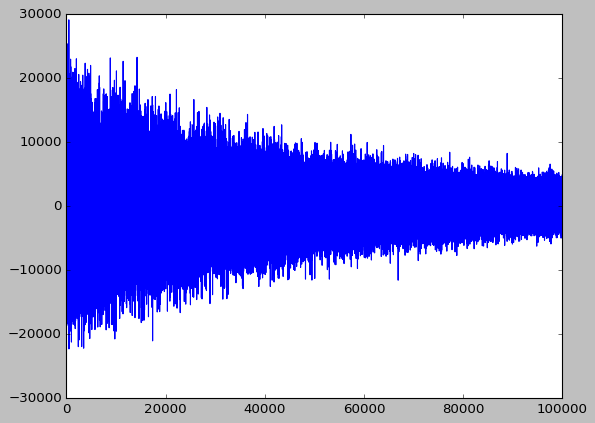

In [3]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
x *= 1000
x = x.astype(np.int16)
plt.plot(x)
plt.show()

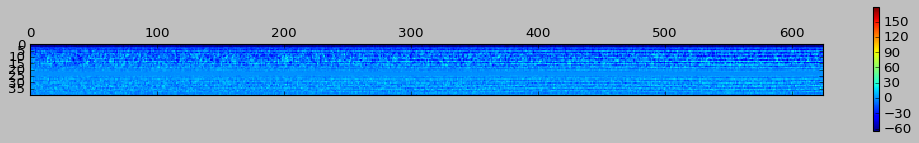

In [4]:
import kaldifeats.feats as F
keywords = {'window_type': 'povey',
            'dither': 0.0,
            'snip_edges': False,
            'preemphasis_coefficient': 1.00,
            'use_energy': False,
            'raw_energy': False,
            'num_mel_bins': 60,
            'sample_frequency': 16000,
            'num_ceps': 40,
            'cepstral_lifter': 22.,
            'round_to_power_of_two': True,
            }
mfcc = F.mfcc_feats(x[:],
                    frame_length=400,
                    frame_shift=160,
                    mode='kaldi_power',
                    detrend='constant',
                    vtln_warp_factor=0.9,
                    **keywords)
plt.matshow(mfcc.T)
plt.colorbar()
plt.show()

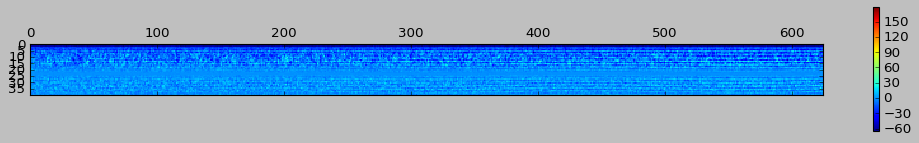

In [5]:
import kaldifeats.commands as C
mfcc2 = C.mfcc_feats(x[:],
                     frame_length_ms=25,
                     frame_shift_ms=10,
                     remove_dc_offset=True,
                     vtln_warp=0.9,
                     **keywords)
plt.matshow(mfcc2.T)
plt.colorbar()
plt.show()

Diff stats:
DescribeResult(nobs=25000, minmax=(-0.00034156288906750376, 0.0003820587659586483), mean=3.8147123506705983e-07, variance=2.86741017111159e-09, skewness=0.09465676218044336, kurtosis=2.3317099008343964)


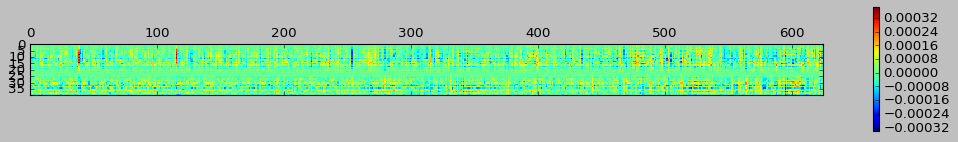

In [6]:
diff = mfcc2 - mfcc
import scipy.stats
print(f'Diff stats:\n{scipy.stats.describe(diff, axis=None)}')
plt.matshow(diff.T)
plt.colorbar()
plt.show()